In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
from sklearn.metrics import r2_score
warnings.simplefilter(action='ignore', category=Warning)

In [399]:
df =pd.read_csv('/home/barbaros/Desktop/ai/7_Coklu_Lineer_Regresyon/Startup/50_Startups.csv')
df=df.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms','State':'st','Profit':'pro'}, inplace =False)
df.head()

,rd,ad,ms,st,pro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [400]:
dummies_list = ['st']
data=df.copy()

for x in dummies_list:
    temp_df=pd.get_dummies(eval('data'+'.'+x), drop_first=False)
    data=pd.concat([data, temp_df], axis=1)
    data.drop([x], axis=1, inplace=True)
data.columns=data.columns.str.lower()
data.head()

,rd,ad,ms,pro,california,florida,new york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [401]:
df=df.rename(columns ={'new york':'newyork'}, inplace =False)


<AxesSubplot: >

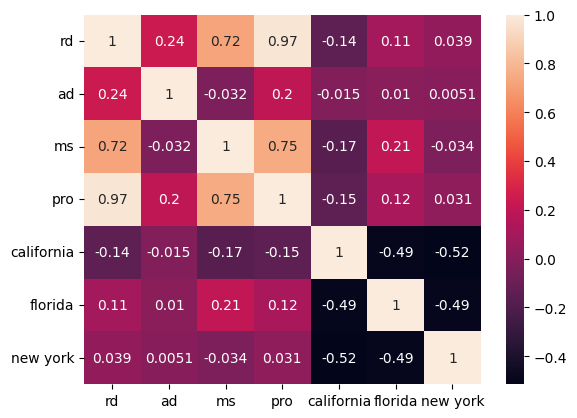

In [402]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot: xlabel='rd', ylabel='pro'>

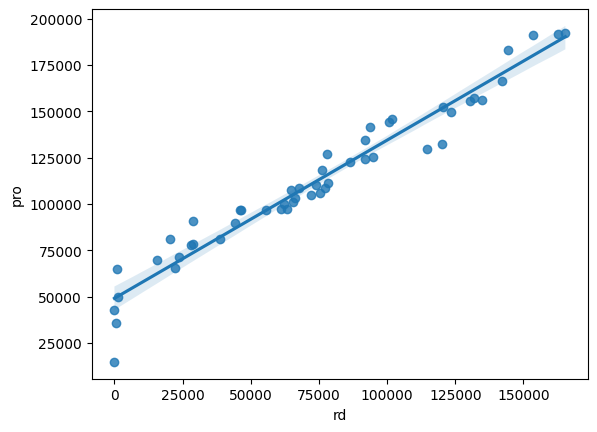

In [403]:
sns.regplot(x = "rd", y = "pro",data = df)

In [404]:
x = data.drop("pro",axis = 1)
y = data["pro"]
x.shape

(50, 6)

In [405]:
y=y.values.reshape(-1,1)
y.shape
r2_l=[]
lis=[]

In [406]:
lr=LinearRegression()
for i in range (100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=i)
    lr=lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    a=r2_score(y_test,y_pred)
    k=(i,a)
    lis.append(k)


In [407]:
print(lis)

[(0, 0.9358680970046516), (1, 0.9529676095424044), (2, 0.943572465147482), (3, 0.9160451837869964), (4, 0.9188974522517734), (5, 0.9754154859051901), (6, 0.9274448093993095), (7, 0.9205715016367035), (8, 0.9067714991893755), (9, 0.9026828068669555), (10, 0.9796796125083208), (11, 0.9108636254362484), (12, 0.9217613323230258), (13, 0.9156595571970103), (14, 0.9625326592489436), (15, 0.8556182115554637), (16, 0.9073218863898921), (17, 0.9041813335273231), (18, 0.8851768452916818), (19, 0.9171348657940381), (20, 0.9475200195893771), (21, 0.9467669195318289), (22, 0.920280738460161), (23, 0.9239301723104781), (24, 0.9422343029297986), (25, 0.9375836086175815), (26, 0.9393333138715284), (27, 0.9219899190858183), (28, 0.8893661174480539), (29, 0.9394330797692343), (30, 0.9113979009216084), (31, 0.961277047613435), (32, 0.8943437577253822), (33, 0.925666285558525), (34, 0.9642233845164812), (35, 0.8561620388161132), (36, 0.8920297655827432), (37, 0.9401363238893613), (38, 0.9529023067404108),

In [408]:
en_kucuk = lis[0][1]
en_buyuk = lis[0][1]
for n in lis:
  p=n
  n=n[1]
  if en_kucuk <n:
    en_kucuk=n
    k=p
print(k)
sayı=k[0]
print(sayı)

(45, 0.9797778038835281)
45


In [409]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 ,random_state=sayı)

In [410]:
def tols(x,y):
    xa=sm.add_constant(x)
    lfit=sm.OLS(y,x)
    sonuc=lfit.fit()
    print(sonuc.summary())
tols(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     79.96
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           4.64e-16
Time:                        17:02:09   Log-Likelihood:                -371.76
No. Observations:                  35   AIC:                             755.5
Df Residuals:                      29   BIC:                             764.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rd             0.8068      0.061     13.134      0.0

In [411]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
sonuc=r2_score(y_test,y_pred)
sonuc

0.9797778038835281

In [412]:
X_train_yeni = x_train[['rd', 'california','florida','new york']]
X_test_yeni=x_test[['rd', 'california','florida','new york']]

In [413]:
tols(X_train_yeni,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     134.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           7.40e-18
Time:                        17:02:09   Log-Likelihood:                -372.70
No. Observations:                  35   AIC:                             753.4
Df Residuals:                      31   BIC:                             759.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rd             0.8429      0.042     20.041      0.0

In [414]:
lr.fit(X_train_yeni, y_train)
y_pred_yeni = lr.predict(X_test_yeni)
sonuc1=r2_score(y_test,y_pred_yeni)
sonuc1

0.973104731252734

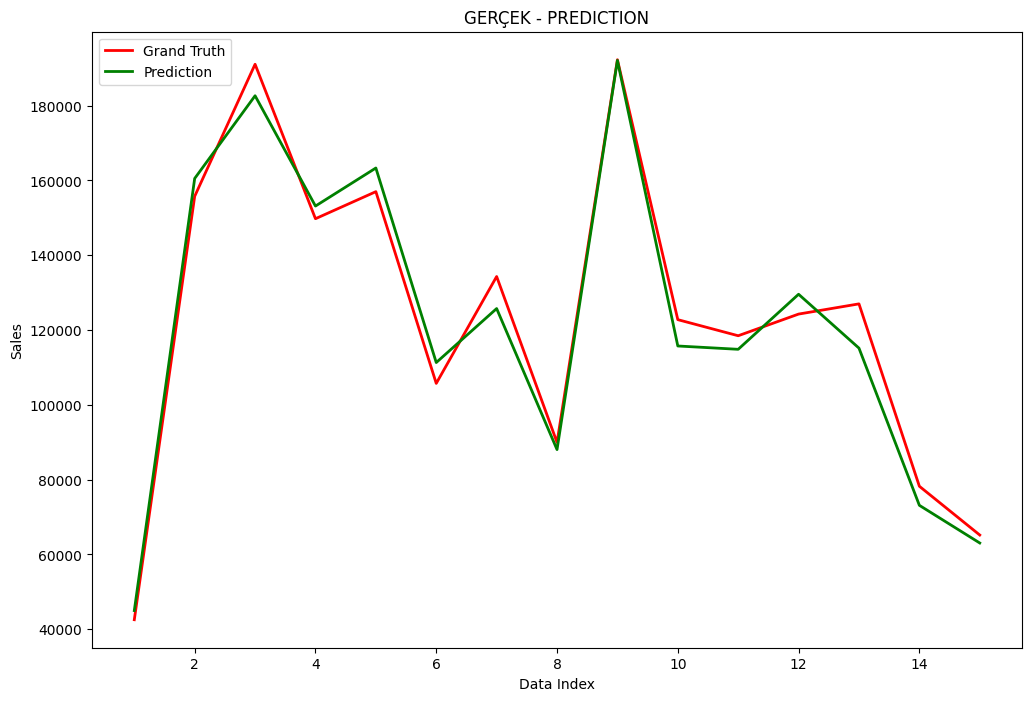

In [415]:
indexler = range(1,16)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label='Grand Truth', color='red', linewidth=2)

# Tahmin -> Prediction
ax.plot(indexler, y_pred, label='Prediction', color='green', linewidth=2)

plt.title('GERÇEK - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

In [416]:
test = pd.DataFrame(y_test).copy() 
test["predicted_Profit"] = y_pred
test

,0,predicted_Profit
0,42559.73,44997.915249
1,155752.60,160521.757223
2,191050.39,182630.107909
3,149759.96,153144.356584
4,156991.12,163315.535531
5,105733.54,111308.722450
6,134307.35,125741.885541
7,89949.14,88041.367213
8,192261.83,192077.818349
9,122776.86,115735.882426


In [417]:
from sklearn.metrics import r2_score
z=r2_score(y_test, y_pred)
print(z)

0.9797778038835281
